### Kaitlyn Perkovic
#### December 10th, 2024

A strong interest of mine for a long time have been video games. More specifically, Teamfight Tactics- or TFT. In TFT, 8 players in a lobby start at one hundred health, create auto-battling boards, and face eachother's boards in a one versus one format. In this battle, at least one person is going to take player damage. Once a player reaches zero or below health- they are eliminated. This sparked my interest in the correlation between player damage done and placement. I believe that the more player damage a player does to an opponent results in a higher placement, and vice versa: the less player damage a player does to an opponent results in a lower placement. In TFT, a higher placement is considered "top 4" or first, second, third, and fourth place, while a lower placement is considered "bot 4" or fifth, sixth, seventh, and eighth place.

I have decided to examine the most five recent matches since December 1st at 5:20PM. Within these five matches, I am examining the correlation between my damage done to players and my placement. The first match is identified as "Match 1", the second match is identified as "Match 2", etc.



To complete this project, I have used the following resources:
- "The Riot API Guide" by iTero Gaming: https://www.youtube.com/playlist?list=PL3vL1pnMCbUERqllcwhcvEJbKum-M9zT5
- Riot Games Developer Portal: https://developer.riotgames.com/
- Data in EMAT Course Repository: https://github.com/dataesilva/data-emat_fa24

In [99]:
import pandas as pd
import requests
import json
import matplotlib
import base64
import matplotlib.pyplot as plt

In [100]:
api_key = "RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc"
api_key

'RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

Defining the variable "api_key" with my own personal api key from riot developer portal. This can be found in the Riot Developer Portal Dashboard. This API key has to be refreshed every 24 hours, as well as all API links.

Since this API key has to be refreshed every 24 hours, it is safe to directly put the API key in the jupyter notebook rather than a txt file.

In [101]:
account_api_url = "https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/KSU%20kaitlyn/2640"

This API url is the url to find an account by user ID.

In [102]:
requests.get(account_api_url)

<Response [401]>

For this request, I was getting a 401 error. This means that I did not have a valid API key to do this request. The URL I am sending has no information about my API Key. I want to attach the API key to the url so that the server knows I have a valid API key and can request the data. To do this I added an argument to the end of the account url. To add the argument I used a question mark. If this were to occur again, I would include the following code:

In [103]:
account_api_url = account_api_url + '?api_key=' + api_key
account_api_url

'https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/KSU%20kaitlyn/2640?api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

The url now has my valid API key. This includes an argument (?) followed by the API key. Now that the server knows I have a valid API key when trying to access the account API url, I get a response of 200 meaning that the call for the API and data was successful.

This API was retrieved from the Riot Developer Portal: https://developer.riotgames.com/apis#account-v1

In [104]:
requests.get(account_api_url)

<Response [200]>

In [105]:
account_response = requests.get(account_api_url)
account_response

<Response [200]>

By giving "requests.get(account_api_url)" a variable of account_response, I am defining the response code that the API I am using (account_api_url) gives. 

In [106]:
my_account_info = account_response.json()
my_account_info

{'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'gameName': 'KSU kaitlyn',
 'tagLine': '2640'}

I can then, in json format, retrieve my account information and extract the data and give this response a variable. Included in the information is the PUUID which I will need for future reference.

In [107]:
my_puuid = my_account_info['puuid']
my_puuid

'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg'

From my account information, I selected only my PUUID as I will need it for the future. I assigned a variable for the PUUID so that in the future, I will not have to retrieve it from account information.

In [108]:
matches_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg/ids?start=0&count=5"
matches_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg/ids?start=0&count=5'

Now, I am calling the API for my five most recent matches using the PUUID that I retrieved from my account information using the first API. I do not need to add an argument since there is one in this API (the ?). Since I cannot add a ? at the end of this API url as it would be incorrect, I have to add an additional argument using &.

This API was retrieved from the Riot Developer Portal: https://developer.riotgames.com/apis#tft-match-v1

In [109]:
matches_api_url = matches_api_url + "&api_key=" + api_key
matches_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg/ids?start=0&count=5&api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

Now, this reads the API we are calling, an argument being the count of the most recent matches, and an additional argument presenting my API valid API key to access the data. These arguements are seperated with "&".

In [110]:
requests.get(matches_api_url)

<Response [200]>

In [111]:
matches_response = requests.get(matches_api_url)
matches_response

<Response [200]>

By giving "requests.get(matches_api_url)" a variable of account_response, I am defining the response code that the API I am using (matches_api_url) gives. 

In [112]:
matches = matches_response.json()
matches

['NA1_5172112397',
 'NA1_5172104993',
 'NA1_5172090425',
 'NA1_5171614818',
 'NA1_5171570567']

I can then use json to extract and retrieve the data which includes my five most recent played matches as of December 3rd, 2024 at 11:15AM.

In [113]:
match1 = matches[0]
match1

'NA1_5172112397'

In [114]:
match2 = matches[1]
match2

'NA1_5172104993'

In [115]:
match3 = matches[2]
match3

'NA1_5172090425'

In [116]:
match4 = matches[3]
match4

'NA1_5171614818'

In [117]:
match5 = matches[4]
match5

'NA1_5171570567'

Here, I am assigning each match a variable for easier use when extracting data about the matches. From here, I copy each match ID into the Riot Developer Portal to retrieve an API for each match- starting with "match", or, the first listed match (NA1_5172112397).

These API's are retrieved from the Riot Developer Portal: https://developer.riotgames.com/apis#tft-match-v1/GET_getMatch

In [118]:
match1_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172112397"
match1_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172112397'

In [119]:
match1_api_url = match1_api_url + "?api_key=" + api_key
match1_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172112397?api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

In [120]:
requests.get(match1_api_url)

<Response [200]>

In [121]:
match1_response = requests.get(match1_api_url)
match1_response

<Response [200]>

In [122]:
match1_data = match1_response.json()
#match1_data

Since there isnt an arugment that includes a valid API key to access the data, I will have to do what I did before and add an argument (my valid API key) using a ? followed by "api_key". After this argument is added, I then get the response code for this API url, give it a variable to define it, and use json to extract and retrieve the data. I will then give each match a variable with their match variable followed by data (ex: match2_data, etc).

I will do this for all matches (match, match1, match2, match3, match4). 

In [123]:
match1_data.keys()

dict_keys(['metadata', 'info'])

In [124]:
match1_data['metadata']

{'data_version': '6',
 'match_id': 'NA1_5172112397',
 'participants': ['kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
  'qDdUIbmdpOh1GpOdtHvQn61zPI9OfqeuVjBL2Mr1l8egtPVaLV6BZJAcGf5a6TpZct_AWKCO5dsLZQ',
  'BOK57RVl6MSKx2LGC9p0fLfRkqSIpkRzLFCWvwODAymvW2k3AlZkEoHNX8XU1Xxxwd5BZdyd_Sa5hg',
  'y16CaI_y8wyIKOXu19qKxPWG1nFmKl_ugzsPhsmFSp8uKw9CL0OX2WVzS06y7t57AwhV0lN3Iqe41Q',
  'mLgCAkEGJ2tA665NHOvcBqioijKqLDfFmdj8egh4EQFlyH_8qRxQVZ1QC-CX55VhogL14hC3qg-d1w',
  'QvTIhW9fEsRMBukJ2V9NiXbFgziAxnnYTBHWo0Xy42ZANcsGlxeNFn1dL7Rkq3lY18SnlnNoLZjAGQ',
  'J0MFZAvafZFecPMen7X6XKUKqaNnGD8t0Bar9Jji3q6YaytCz29c65H6SAHXxIPjIKn0wbBqJajmKQ',
  'Q1WDpdTvlFV9LX3aIgwyqby2wAvVlNvw80-ArH5E0_qsbDu7njFy-dgWiQyo9JYA1IDl14-z7fAHEw']}

The metadata includes the data version, match id, and the PUUID's from all 8 players in the match.

In [125]:
match1_data['info']

{'endOfGameResult': 'GameComplete',
 'gameCreation': 1733237611000,
 'gameId': 5172112397,
 'game_datetime': 1733239961056,
 'game_length': 2332.836669921875,
 'game_version': 'Linux Version 14.23.636.9832 (Nov 19 2024/18:19:18) [PUBLIC] <Releases/14.23>',
 'mapId': 22,
 'participants': [{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
    'item_ID': 52039,
    'skin_ID': 39,
    'species': 'PetBunny'},
   'gold_left': 1,
   'last_round': 34,
   'level': 7,
   'missions': {'PlayerScore2': 210},
   'placement': 4,
   'players_eliminated': 0,
   'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
   'riotIdGameName': 'KSU kaitlyn',
   'riotIdTagline': '2640',
   'time_eliminated': 2106.525146484375,
   'total_damage_to_players': 89,
   'traits': [{'name': 'TFT13_Ambassador',
     'num_units': 1,
     'style': 1,
     'tier_current': 1,
     'tier_total': 2},
    {'name': 'TFT13_Ambusher',
     'num_units': 4,
     'style': 2,
   

In [126]:
match1_data['info'].keys()

dict_keys(['endOfGameResult', 'gameCreation', 'gameId', 'game_datetime', 'game_length', 'game_version', 'mapId', 'participants', 'queueId', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number'])

Since I know that this is a dictionary (as told by the {}), I am able to find the keys of the data. "match_data['metadata']" includes a list of the puuid of the players, match id, and data version. match_data['info'] includes the game-specific information: this is a dictionary as well, so I am able to find the keys.

In [178]:
match1_data['info']['participants'][0]

{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
  'item_ID': 52039,
  'skin_ID': 39,
  'species': 'PetBunny'},
 'gold_left': 1,
 'last_round': 34,
 'level': 7,
 'missions': {'PlayerScore2': 210},
 'placement': 4,
 'players_eliminated': 0,
 'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'riotIdGameName': 'KSU kaitlyn',
 'riotIdTagline': '2640',
 'time_eliminated': 2106.525146484375,
 'total_damage_to_players': 89,
 'traits': [{'name': 'TFT13_Ambassador',
   'num_units': 1,
   'style': 1,
   'tier_current': 1,
   'tier_total': 2},
  {'name': 'TFT13_Ambusher',
   'num_units': 4,
   'style': 2,
   'tier_current': 3,
   'tier_total': 4},
  {'name': 'TFT13_Crime',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 5},
  {'name': 'TFT13_Family',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 3},
  {'name': 'TFT13_Hoverboard',
   'num_units': 2,
   'style': 1,
   'tier_current': 1,

The structure of this code includes which match I am looking at, the information about the match, the participant information about the match, and which participant I am looking at. For this project, I am looking at my own information- specifically total damage done to other players ('total_damage_to_players') and placement ('placement'). 

In [179]:
match1_dmg = match1_data['info']['participants'][7]['total_damage_to_players']

In [180]:
match1_place = match1_data['info']['participants'][7]['placement']

In [181]:
match1_stats = (match1_dmg, match1_place)
match1_stats

(139, 2)

We can see that I did 139 player damage amongst 7 other players and placed 2nd out of 8 players.

Here, I extracted my player damage and placement and gave both a variable. I also combined both and assigned it a variable to create a point to plot for future use.

The next lines of codes are retrieving information for the next 4 games. This includes
- Retrieving the API url from the Riot Developer Portal using the match ID's
- Including an argument into the original API
- Getting a response code to ensure the API is working, including giving this a variable.
- Retrieving the game information using json, including giving this data a variable.
- Retrieving the game keys.
- Retrieving the game keys under "info".
- Retrieving participant, or my own, stats per each game.
- Retrieving total player damage and placement - giving each of these a variable.
- Putting player damage and placement into an (x,y) format.

In [182]:
match2_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172104993"

In [183]:
match2_api_url = match2_api_url + "?api_key=" + api_key
match2_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172104993?api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

In [184]:
requests.get(match2_api_url)

<Response [200]>

In [185]:
match2_response = requests.get(match2_api_url)
match2_response

<Response [200]>

In [186]:
match2_data = match2_response.json()
#match2_data

In [187]:
match2_data.keys()

dict_keys(['metadata', 'info'])

In [188]:
match2_data['info'].keys()

dict_keys(['endOfGameResult', 'gameCreation', 'gameId', 'game_datetime', 'game_length', 'game_version', 'mapId', 'participants', 'queueId', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number'])

In [189]:
match2_data['info']['participants'][4]

{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
  'item_ID': 52039,
  'skin_ID': 39,
  'species': 'PetBunny'},
 'gold_left': 1,
 'last_round': 28,
 'level': 8,
 'missions': {'PlayerScore2': 81},
 'placement': 5,
 'players_eliminated': 0,
 'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'riotIdGameName': 'KSU kaitlyn',
 'riotIdTagline': '2640',
 'time_eliminated': 1635.09716796875,
 'total_damage_to_players': 56,
 'traits': [{'name': 'TFT13_Ambusher',
   'num_units': 2,
   'style': 1,
   'tier_current': 1,
   'tier_total': 4},
  {'name': 'TFT13_Bruiser',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 3},
  {'name': 'TFT13_Challenger',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 3},
  {'name': 'TFT13_Crime',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 5},
  {'name': 'TFT13_HighRoller',
   'num_units': 1,
   'style': 3,
   'tier_current': 1,


In [190]:
match2_dmg = match2_data['info']['participants'][4]['total_damage_to_players']
match2_dmg

56

In [191]:
match2_place = match2_data['info']['participants'][4]['placement']
match2_place

5

In [192]:
match2_stats = (match2_dmg, match2_place)
match2_stats

(56, 5)

We can see that I did 56 player damage amongst 7 other players and placed 5th out of 8 players.

In [193]:
match3_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172090425"

In [194]:
match3_api_url = match3_api_url + "?api_key=" + api_key
match3_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5172090425?api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

In [195]:
requests.get(match3_api_url)

<Response [200]>

In [196]:
match3_response = requests.get(match3_api_url)
match3_response

<Response [200]>

In [197]:
match3_response.json()

{'metadata': {'data_version': '6',
  'match_id': 'NA1_5172090425',
  'participants': ['b20WMxqosk7fftMIXPq-OWf32Yu44cIMzDUEPUNA4urFPBzSDmDAsgC0uxTwKE4UXI23AqSiT6z5Qg',
   'fyVKrFDsy0pbo3yVDkuGe90XstfOU0hYulpLkbhgq9jbiKzqGS5UgbwzVuVv8ynzmb7rSjK36nfc4g',
   'ngSWRzOS0qLMN-kWFyPDGIJWcdsWWprGDW3nSg6SaEluKWU6o_jRO0_rLqswgkirg4PatbCd8KDU_g',
   'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
   'j0vdARoQWrFUtM4QRKeueKZolZ3lbD7Xn6-1EAK58r3WUJ8H6p2ZFFyo3sGB-JVAbHRdkUZ1sZYv-w',
   'lQ9wSj7cNVW1AzT07HmHtuWG0l_Lk5LwuJdEcH3Cq8MXXIMNJ6AAUsksBTDQ1c63nomMiDtGB9_QBg',
   'AeQN148oIDc6Mq4Ihi7z4kN8yjZNryMdhVsjM_jat3qouengZR2sq0ynV7CGEzrCZX7gSA0ETTfxWQ',
   'vDxuQ7LntfV__sk_F0ukoAQEQl4eP7A-NTTBnq36Qm7QJQo8cEPY9hodYNEoIeJKPEN65yAj1CcxQw']},
 'info': {'endOfGameResult': 'GameComplete',
  'gameCreation': 1733232952000,
  'gameId': 5172090425,
  'game_datetime': 1733235268255,
  'game_length': 2305.4990234375,
  'game_version': 'Linux Version 14.23.636.9832 (Nov 19 2024/18:1

In [198]:
match3_data = match3_response.json()
#match3_data

In [199]:
match3_data.keys()

dict_keys(['metadata', 'info'])

In [200]:
match3_data['info'].keys()

dict_keys(['endOfGameResult', 'gameCreation', 'gameId', 'game_datetime', 'game_length', 'game_version', 'mapId', 'participants', 'queueId', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number'])

In [204]:
match3_data['info']['participants'][3]

{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
  'item_ID': 52039,
  'skin_ID': 39,
  'species': 'PetBunny'},
 'gold_left': 1,
 'last_round': 33,
 'level': 9,
 'missions': {'PlayerScore2': 189},
 'placement': 4,
 'players_eliminated': 0,
 'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'riotIdGameName': 'KSU kaitlyn',
 'riotIdTagline': '2640',
 'time_eliminated': 1898.5689697265625,
 'total_damage_to_players': 84,
 'traits': [{'name': 'TFT13_Academy',
   'num_units': 4,
   'style': 2,
   'tier_current': 2,
   'tier_total': 4},
  {'name': 'TFT13_FormSwapper',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 2},
  {'name': 'TFT13_Invoker',
   'num_units': 2,
   'style': 1,
   'tier_current': 1,
   'tier_total': 4},
  {'name': 'TFT13_JunkerKing',
   'num_units': 1,
   'style': 3,
   'tier_current': 1,
   'tier_total': 1},
  {'name': 'TFT13_Martialist',
   'num_units': 1,
   'style': 0,
   'tier_curre

In [205]:
match3_dmg = match3_data['info']['participants'][0]['total_damage_to_players']
match3_dmg

164

In [206]:
match3_place = match3_data['info']['participants'][0]['placement']
match3_place

2

In [207]:
match3_stats = (match3_dmg, match3_place)
match3_stats

(164, 2)

We can see that I did 164 player damage amongst 7 other players and placed 2nd out of 8 players.

In [208]:
match4_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5171614818"
match4_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5171614818'

In [209]:
match4_api_url = match4_api_url + "?api_key=" + api_key
match4_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5171614818?api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

In [210]:
requests.get(match4_api_url)

<Response [200]>

In [211]:
match4_response = requests.get(match4_api_url)
match4_response

<Response [200]>

In [212]:
match4_response.json()

{'metadata': {'data_version': '6',
  'match_id': 'NA1_5171614818',
  'participants': ['kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
   'GL9d0PZ8YmnGwwjxf80rIaNjlm7xeYtKyXRT3ghJDCJj5DFga6GqjfXqWzHsY42il2Jcftn2uVYnlQ',
   'YaCyMPzvf9Nkkjhr0wUGAJ4j8uCqMogq2paC45XM1tQEVHZXEsC80qz-V-3BGVBgl5I6D52Ad1SSpQ',
   'SF1UtFL_E3-aQ4-6ewBjuzlsLhie5j25BCfoJv1vLeVmutxoKlhS26u0phCW5ezeaGn1xQW946w_HQ',
   'Qrnkz1LNMmcWtaAkE3KEqGgxh9AB9zZPXLTdpeEaibEA_z6L6kqz6fPIk5IpNeruxBDGK-Ez410c3Q',
   'O_NPeoFlULlJxtihjtYsn0Mx1Bi2VI93mA2-4C_u_sZf6SHO22SJbFRuAGaH2bH_sBG3P1J5EwXUeg',
   'CakW2VezHiOPBhG_3iHiQnkITn-4mPTGDN3Z-HaahaurrEJhuFB7UKgvTuMzXlRLSkVoQCumu5_MaA',
   '3dj07Xg4frenx8n5nN7q2AZulW-tGDLu6yDOl9BENwH00F6XA_NAmfXjjZ8l3FQf-zCt9To6kKcqSQ']},
 'info': {'endOfGameResult': 'GameComplete',
  'gameCreation': 1733191073000,
  'gameId': 5171614818,
  'game_datetime': 1733192950427,
  'game_length': 1861.66015625,
  'game_version': 'Linux Version 14.23.636.9832 (Nov 19 2024/18:19:

In [213]:
match4_data = match4_response.json()
#match4_data

In [214]:
match4_data.keys()

dict_keys(['metadata', 'info'])

In [215]:
match4_data['info']

{'endOfGameResult': 'GameComplete',
 'gameCreation': 1733191073000,
 'gameId': 5171614818,
 'game_datetime': 1733192950427,
 'game_length': 1861.66015625,
 'game_version': 'Linux Version 14.23.636.9832 (Nov 19 2024/18:19:18) [PUBLIC] <Releases/14.23>',
 'mapId': 22,
 'participants': [{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
    'item_ID': 52039,
    'skin_ID': 39,
    'species': 'PetBunny'},
   'gold_left': 1,
   'last_round': 30,
   'level': 9,
   'missions': {'PlayerScore2': 184},
   'partner_group_id': 1,
   'placement': 3,
   'players_eliminated': 2,
   'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
   'riotIdGameName': 'KSU kaitlyn',
   'riotIdTagline': '2640',
   'time_eliminated': 1848.48046875,
   'total_damage_to_players': 72,
   'traits': [{'name': 'TFT13_Ambassador',
     'num_units': 4,
     'style': 4,
     'tier_current': 2,
     'tier_total': 2},
    {'name': 'TFT13_Challenger',
     'num_units': 1,


In [216]:
match4_data['info'].keys()

dict_keys(['endOfGameResult', 'gameCreation', 'gameId', 'game_datetime', 'game_length', 'game_version', 'mapId', 'participants', 'queueId', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number'])

In [217]:
match4_data['info']['participants'][0]

{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
  'item_ID': 52039,
  'skin_ID': 39,
  'species': 'PetBunny'},
 'gold_left': 1,
 'last_round': 30,
 'level': 9,
 'missions': {'PlayerScore2': 184},
 'partner_group_id': 1,
 'placement': 3,
 'players_eliminated': 2,
 'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'riotIdGameName': 'KSU kaitlyn',
 'riotIdTagline': '2640',
 'time_eliminated': 1848.48046875,
 'total_damage_to_players': 72,
 'traits': [{'name': 'TFT13_Ambassador',
   'num_units': 4,
   'style': 4,
   'tier_current': 2,
   'tier_total': 2},
  {'name': 'TFT13_Challenger',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 3},
  {'name': 'TFT13_Crime',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 5},
  {'name': 'TFT13_FormSwapper',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 2},
  {'name': 'TFT13_HighRoller',
   'num_units': 1,
   'style

In [218]:
match4_dmg = match4_data['info']['participants'][2]['total_damage_to_players']
match4_dmg

44

In [219]:
match4_place = match4_data['info']['participants'][2]['placement']
match4_place

7

In [220]:
match4_stats = (match4_dmg, match4_place)
match4_stats

(44, 7)

We can see that I did 44 player damage amongst 7 other players and placed 7th out of 8 players.

In [221]:
match5_api_url = "https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5171570567"
match5_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5171570567'

In [222]:
match5_api_url = match5_api_url + "?api_key=" + api_key
match5_api_url

'https://americas.api.riotgames.com/tft/match/v1/matches/NA1_5171570567?api_key=RGAPI-01a195b4-7650-4cfe-90af-066f2b571dfc'

In [223]:
requests.get(match5_api_url)

<Response [200]>

In [224]:
match5_response = requests.get(match4_api_url)
match5_response

<Response [200]>

In [225]:
match5_response.json()

{'metadata': {'data_version': '6',
  'match_id': 'NA1_5171614818',
  'participants': ['kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
   'GL9d0PZ8YmnGwwjxf80rIaNjlm7xeYtKyXRT3ghJDCJj5DFga6GqjfXqWzHsY42il2Jcftn2uVYnlQ',
   'YaCyMPzvf9Nkkjhr0wUGAJ4j8uCqMogq2paC45XM1tQEVHZXEsC80qz-V-3BGVBgl5I6D52Ad1SSpQ',
   'SF1UtFL_E3-aQ4-6ewBjuzlsLhie5j25BCfoJv1vLeVmutxoKlhS26u0phCW5ezeaGn1xQW946w_HQ',
   'Qrnkz1LNMmcWtaAkE3KEqGgxh9AB9zZPXLTdpeEaibEA_z6L6kqz6fPIk5IpNeruxBDGK-Ez410c3Q',
   'O_NPeoFlULlJxtihjtYsn0Mx1Bi2VI93mA2-4C_u_sZf6SHO22SJbFRuAGaH2bH_sBG3P1J5EwXUeg',
   'CakW2VezHiOPBhG_3iHiQnkITn-4mPTGDN3Z-HaahaurrEJhuFB7UKgvTuMzXlRLSkVoQCumu5_MaA',
   '3dj07Xg4frenx8n5nN7q2AZulW-tGDLu6yDOl9BENwH00F6XA_NAmfXjjZ8l3FQf-zCt9To6kKcqSQ']},
 'info': {'endOfGameResult': 'GameComplete',
  'gameCreation': 1733191073000,
  'gameId': 5171614818,
  'game_datetime': 1733192950427,
  'game_length': 1861.66015625,
  'game_version': 'Linux Version 14.23.636.9832 (Nov 19 2024/18:19:

In [226]:
match5_data = match5_response.json()
#match5_data

In [227]:
match5_data.keys()

dict_keys(['metadata', 'info'])

In [228]:
match5_data['info']

{'endOfGameResult': 'GameComplete',
 'gameCreation': 1733191073000,
 'gameId': 5171614818,
 'game_datetime': 1733192950427,
 'game_length': 1861.66015625,
 'game_version': 'Linux Version 14.23.636.9832 (Nov 19 2024/18:19:18) [PUBLIC] <Releases/14.23>',
 'mapId': 22,
 'participants': [{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
    'item_ID': 52039,
    'skin_ID': 39,
    'species': 'PetBunny'},
   'gold_left': 1,
   'last_round': 30,
   'level': 9,
   'missions': {'PlayerScore2': 184},
   'partner_group_id': 1,
   'placement': 3,
   'players_eliminated': 2,
   'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
   'riotIdGameName': 'KSU kaitlyn',
   'riotIdTagline': '2640',
   'time_eliminated': 1848.48046875,
   'total_damage_to_players': 72,
   'traits': [{'name': 'TFT13_Ambassador',
     'num_units': 4,
     'style': 4,
     'tier_current': 2,
     'tier_total': 2},
    {'name': 'TFT13_Challenger',
     'num_units': 1,


In [229]:
match5_data['info'].keys()

dict_keys(['endOfGameResult', 'gameCreation', 'gameId', 'game_datetime', 'game_length', 'game_version', 'mapId', 'participants', 'queueId', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number'])

In [231]:
match5_data['info']['participants'][0]

{'companion': {'content_ID': '5239586e-61fe-4f76-a3b4-82b0f4d80325',
  'item_ID': 52039,
  'skin_ID': 39,
  'species': 'PetBunny'},
 'gold_left': 1,
 'last_round': 30,
 'level': 9,
 'missions': {'PlayerScore2': 184},
 'partner_group_id': 1,
 'placement': 3,
 'players_eliminated': 2,
 'puuid': 'kAyLsUWjjLXsTfx2KTnaoJosyIFQlTEgV7Cq7P6FFlkcNqJvomESh7u2NUncHkluC_-fAxGdt1xSVg',
 'riotIdGameName': 'KSU kaitlyn',
 'riotIdTagline': '2640',
 'time_eliminated': 1848.48046875,
 'total_damage_to_players': 72,
 'traits': [{'name': 'TFT13_Ambassador',
   'num_units': 4,
   'style': 4,
   'tier_current': 2,
   'tier_total': 2},
  {'name': 'TFT13_Challenger',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 3},
  {'name': 'TFT13_Crime',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 5},
  {'name': 'TFT13_FormSwapper',
   'num_units': 1,
   'style': 0,
   'tier_current': 0,
   'tier_total': 2},
  {'name': 'TFT13_HighRoller',
   'num_units': 1,
   'style

In [232]:
match5_dmg = match5_data['info']['participants'][6]['total_damage_to_players']
match5_dmg

79

In [233]:
match5_place = match5_data['info']['participants'][6]['placement']
match5_place

2

In [234]:
match5_stats = (match5_dmg, match5_place)
match5_stats

(79, 2)

We can see that I did 79 player damage amongst 7 other players and placed 2nd out of 8 players.

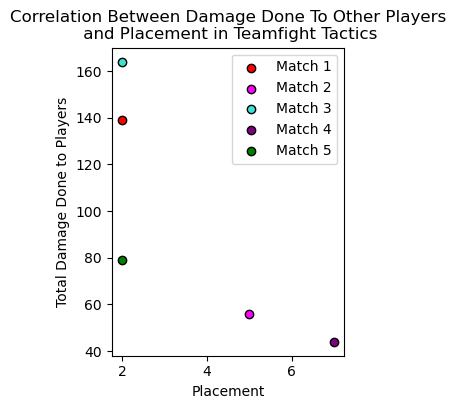

In [236]:
fig1, ax1 = plt.subplots(figsize = (3,4))
ax1.scatter(x = match1_place, y = match1_dmg, label = 'Match 1', color = 'red', edgecolors = 'black')
ax1.scatter(x = match2_place, y = match2_dmg, label = 'Match 2', color = 'magenta', edgecolors = 'black' )
ax1.scatter(x = match3_place, y = match3_dmg, label = 'Match 3', color = 'turquoise', edgecolors = 'black')
ax1.scatter(x = match4_place, y = match4_dmg, label = 'Match 4', color = 'purple', edgecolors = 'black')
ax1.scatter(x = match5_place, y = match5_dmg, label = 'Match 5', color = 'green', edgecolors = 'black')

ax1.set_title('Correlation Between Damage Done To Other Players\n and Placement in Teamfight Tactics')
ax1.set_xlabel('Placement')
ax1.set_ylabel('Total Damage Done to Players')
ax1.legend()

plt.show()

To make this scatterplot, I included both damage done to players and placement from all five matches. I have color coded each point on the graph to identify each map, as well as included a legend. The X axis is the placement and the Y axis is the player damage.

From this scatterplot, we can see that the higher the damage done to players is, the higher the placement is. For example, in Match 3, we can see that the player damage is above 160 and the placement is at 2. On the other hand, in Match 4, we can see that the player damage is a little above 40 and the placement is at 8.

However, this may not always be the case. Although I did over 160 damage and placed second in Match 3, in Match 5, I did about half of the damage and placed the same placement.

Overall, this report was a fun yet tedious report to examine. One of the more difficult parts were extracting data from the API's. At first, I struggled with this. However, I watched videos on how to use Riot Games' API's and understood the process to extract the data from these API's. 

A limitation of this report is the data collection method. In the Riot Developer Portal, the API Key refreshes every day. For this project, it is safe for me to put the API key in the jupyter notebook since the key will not be valid within twenty four hours. However, this type of data collection - refreshing the API key, API links, match ID's, etc., is a very tedious and detailed process. 

An alternative approach for this report is to examine other or more correlations, such as a more specific correlation. With this data set, this could be traits played and placement, amount of units on board and gold spent- the correlations are endless.

The next steps for this report are to examine other correlations I could include. Other next steps include more visualizations and how I could visualize this type of data and correlation.